# Data Cleaning

In [6]:
# import libraries
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [7]:
company_df=pd.read_csv(r'c:\Projects\company_20220625.csv')

In [8]:
company_df1=company_df.copy()

In [9]:
company_df1

,Unnamed: 0,Company_Names,World_Ranks,Market_Cap,Headquarter_of_Company,Sector,Annual_Rev,Annual_Net_Inc,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO
0,0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),World Rank (Jan-2020): 1,Market Cap (Jan-01-2020): 1898.10 Billion USD,Headquarters of Company: Saudi Arabia,"Sector: Energy, Oil and Gas, Chemicals, Oil Re...",Annual Revenue: Saudi Aramco Annual Revenues f...,Annual Net Income: Saudi Aramco Annual Net Inc...,Total Assets: Total Assets of Saudi Aramco as ...,"Total Employees: 79,800",Employee Count as on Date: As on March 2021,CEO: Amin H. Al-Nasser
1,1,APPLE,World Rank (Jan-2020): 2,Market Cap (Jan-01-2020): 1323.00 Billion USD,Headquarters of Company: USA,"Sector: Technology, Mobiles & Accessories, Ele...",Annual Revenue: Apple Annual Revenues for Sept...,Annual Net Income: Apple Annual Net Income for...,Total Assets: Apple Total Assets as on June-27...,"Total Employees: 154,000",Employee Count as on Date: As on 2021,CEO: Tim Cook
2,2,MICROSOFT CORPORATION,World Rank (Jan-2020): 3,Market Cap (Jan-01-2020): 1215.00 Billion USD,Headquarters of Company: USA,"Sector: Technology, Software and IT, Laptops, ...",Annual Revenue: Microsoft Annual Revenues for ...,Annual Net Income: Microsoft Annual Net Income...,Total Assets: Total Assets of Microsoft Corpor...,"Total Employees: 182,268",Employee Count as on Date: As on Dec-2021,CEO: Satya Nadella
3,3,ALPHABET,World Rank (Jan-2020): 4,Market Cap (Jan-01-2020): 943.90 Billion USD,Headquarters of Company: USA,"Sector: Technology, Internet or Mobile App Bas...",Annual Revenue: Alphabet Annual Revenues for D...,Annual Net Income: Alphabet Annual Net Income ...,Total Assets: 299.243 Billion USD as on Sep-2020,"Total Employees: 156,500",Employee Count as on Date: As on Dec-2021,CEO: Sundar Pichai
4,4,AMAZON.COM,World Rank (Jan-2020): 5,Market Cap (Jan-01-2020): 941.03 Billion USD,Headquarters of Company: USA,"Sector: eCommerce, Internet or Mobile App Base...",Annual Revenue: Amazon Annual Revenues for Dec...,Annual Net Income: Amazon Annual Net Income fo...,Total Assets: Total Assets of Amazon as on Jun...,"Total Employees: 1,335,000",Employee Count as on Date: As on 2021,CEO: Andy Jassy
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,SEVEN & I HOLDINGS,World Rank (Jan-2020): 471,Market Cap (Jan-01-2020): 32.65 Billion USD,Headquarters of Company: Japan,"Sector: Consumer Defensive, Retail, Super Mark...",Annual Revenue: SEVEN & I HOLDINGS Annual Reve...,Annual Net Income: SEVEN & I HOLDINGS Annual N...,NaN,"Total Employees: 138,808",Employee Count as on Date: As on 2021,CEO: Ryuichi Isaka
496,496,ASSICURAZIONI GENERALI,World Rank (Jan-2020): 472,Market Cap (Jan-01-2020): 32.61 Billion USD,Headquarters of Company: Italy,"Sector: Financial Services, Insurance",Annual Revenue: ASSICURAZIONI GENERALI Annual ...,Annual Net Income: ASSICURAZIONI GENERALI Annu...,NaN,"Total Employees: 72,644",Employee Count as on Date: As on May 2021,CEO: Philippe Donnet
497,497,AMPHENOL CORPORATION,World Rank (Jan-2020): 473,Market Cap (Jan-01-2020): 32.53 Billion USD,Headquarters of Company: USA,"Sector: Technology, Electronics, Cables and Wi...",Annual Revenue: AMPHENOL CORPORATION Annual Re...,Annual Net Income: AMPHENOL CORPORATION Annual...,NaN,"Total Employees: 90,000",Employee Count as on Date: As on 2021,CEO: Richard Adam Norwitt
498,498,GENERAL MILLS,World Rank (Jan-2020): 474,Market Cap (Jan-01-2020): 32.52 Billion USD,Headquarters of Company: USA,"Sector: Consumer Defensive, Food Products, FMC...",Annual Revenue: GENERAL MILLS Annual Revenues ...,Annual Net Income: GENERAL MILLS Annual Net In...,Total Assets: GENERAL MILLS Total Assets as on...,"Total Employees: 35,000",Employee Count as on Date: As on 2021,CEO: Jeff Harmening


In [10]:
# while extracting data column names are overwritten by the rows.so, we splitted the column into two column

company_df1[['World_Ranks:','World_Ranks(Jan-2020)']]=company_df1['World_Ranks'].str.split(':',expand=True)
company_df1[['Market_Cap:','Market_Cap(In_Billion_USD)']]=company_df1['Market_Cap'].str.split(':',expand=True)


In [11]:
# while extracting data column names are overwritten by the rows.so, we replaced unwanted data with space

company_df1['Annual_Rev']=company_df1['Annual_Rev'].str.strip().str.replace('Annual Revenue: ','')
company_df1['Annual_Net_Inc']=company_df1['Annual_Net_Inc'].str.strip().str.replace('Annual Net Income:','')
company_df1['Headquarter_of_Company']=company_df1['Headquarter_of_Company'].str.strip().str.replace('Headquarters of Company:','')
company_df1['Sector']=company_df1['Sector'].str.strip().str.replace('Sector:','')
company_df1['Total_Assets']=company_df1['Total_Assets'].str.strip().str.replace('Total Assets:','')
company_df1['Total_Employees']=company_df1['Total_Employees'].str.strip().str.replace('Total Employees:','')
company_df1['Employee_Count_as_on_Date']=company_df1['Employee_Count_as_on_Date'].str.strip().str.replace('Employee Count as on Date: As on ','')
company_df1['CEO']=company_df1['CEO'].str.strip().str.replace('CEO:','')

In [12]:
company_df1['Market_Cap(In_Billion_USD)'][34]

' 226.85 Billion USD'

In [13]:
# Here  Market cap column is in object dtype so,we want to convert into numerical column then we replaced the Billon USD with space

company_df1['Market_Cap(In_Billion_USD)']=company_df1['Market_Cap(In_Billion_USD)'].str.strip().str.replace('Billion USD','')

In [14]:
company_df1['Market_Cap(In_Billion_USD)'][34]

'226.85 '

In [15]:
# here we dropped unwanted columns

company_df1.drop(['Unnamed: 0','World_Ranks','World_Ranks:','Market_Cap','Market_Cap:'],axis=1,inplace=True)

In [16]:
company_df1

,Company_Names,Headquarter_of_Company,Sector,Annual_Rev,Annual_Net_Inc,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD)
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),Saudi Arabia,"Energy, Oil and Gas, Chemicals, Oil Refining,...",Saudi Aramco Annual Revenues for December-2020...,Saudi Aramco Annual Net Income for December-2...,Total Assets of Saudi Aramco as on December-2...,"79,800",March 2021,Amin H. Al-Nasser,1,1898.10
1,APPLE,USA,"Technology, Mobiles & Accessories, Electronic...",Apple Annual Revenues for September-2020 endin...,Apple Annual Net Income for September-2020 en...,"Apple Total Assets as on June-27-2020 is 317,...","154,000",2021,Tim Cook,2,1323.00
2,MICROSOFT CORPORATION,USA,"Technology, Software and IT, Laptops, Video G...",Microsoft Annual Revenues for June-2020 ending...,Microsoft Annual Net Income for June-2020 end...,"Total Assets of Microsoft Corporation is 301,...","182,268",Dec-2021,Satya Nadella,3,1215.00
3,ALPHABET,USA,"Technology, Internet or Mobile App Based Busi...",Alphabet Annual Revenues for December-2020 end...,Alphabet Annual Net Income for December-2020 ...,299.243 Billion USD as on Sep-2020,"156,500",Dec-2021,Sundar Pichai,4,943.90
4,AMAZON.COM,USA,"eCommerce, Internet or Mobile App Based Busin...",Amazon Annual Revenues for December-2020 endin...,Amazon Annual Net Income for December-2020 en...,"Total Assets of Amazon as on Jun-2020 is 110,...","1,335,000",2021,Andy Jassy,5,941.03
...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,Japan,"Consumer Defensive, Retail, Super Markets, Co...",SEVEN & I HOLDINGS Annual Revenues as on Decem...,SEVEN & I HOLDINGS Annual Net Income as on De...,NaN,"138,808",2021,Ryuichi Isaka,471,32.65
496,ASSICURAZIONI GENERALI,Italy,"Financial Services, Insurance",ASSICURAZIONI GENERALI Annual Revenues as on D...,ASSICURAZIONI GENERALI Annual Net Income as o...,NaN,"72,644",May 2021,Philippe Donnet,472,32.61
497,AMPHENOL CORPORATION,USA,"Technology, Electronics, Cables and Wires, El...",AMPHENOL CORPORATION Annual Revenues as on Dec...,AMPHENOL CORPORATION Annual Net Income as on ...,NaN,"90,000",2021,Richard Adam Norwitt,473,32.53
498,GENERAL MILLS,USA,"Consumer Defensive, Food Products, FMCG, Dair...",GENERAL MILLS Annual Revenues as on December-2...,GENERAL MILLS Annual Net Income as on Decembe...,GENERAL MILLS Total Assets as on August-2020 ...,"35,000",2021,Jeff Harmening,474,32.52


In [17]:
company_df1['Annual_Rev'][91]
company_df1['Annual_Rev'][29]

'ANT GROUP Annual Revenues for FY-2019 : 17.82 Billion USD'

'ROYAL DUTCH SHELL Annual Revenues for December-2020 ending is 180.64 Billion USD'

In [18]:
# actually we want to split Annual_Rev column with 'is' but there is ':' in it so, first we replaced ':' with 'is' then 'is' with ','

company_df1['Annual_Rev']=company_df1['Annual_Rev'].str.strip().str.replace(':','is')
company_df1['Annual_Rev']=company_df1['Annual_Rev'].str.strip().str.replace('is',',')

In [19]:
company_df1['Annual_Rev'][91]
company_df1['Annual_Rev'][29]

'ANT GROUP Annual Revenues for FY-2019 , 17.82 Billion USD'

'ROYAL DUTCH SHELL Annual Revenues for December-2020 ending , 180.64 Billion USD'

In [20]:
# Here,we splitted the Annual_Rev column with ',' and stored it in a new column Annual_Revenue

company_df1['Annual_revenue']=company_df1['Annual_Rev'].apply(lambda x:str(x).split(",")).apply(lambda x:x[-1])

In [21]:
company_df1['Annual_revenue'][62]

'NVIDIA CORPORATION Annual Revenues for January-2021 ending was 16.67 Billion USD'

In [22]:
# while we splitting the Annual_Revenue with ',' we got some unwanted data so,we used indexing because there is no common in between them

company_df1['Annual_revenue'][62]=company_df1['Annual_revenue'][62][63:]
company_df1['Annual_revenue'][486]=company_df1['Annual_revenue'][486][:15]
company_df1['Annual_revenue'][480]=company_df1['Annual_revenue'][480][:15]
company_df1['Annual_revenue'][471]=company_df1['Annual_revenue'][471][:17]
company_df1['Annual_revenue'][469]=company_df1['Annual_revenue'][469][37:]
company_df1['Annual_revenue'][457]=company_df1['Annual_revenue'][457][:15]
company_df1['Annual_revenue'][440]=company_df1['Annual_revenue'][440][:15]
company_df1['Annual_revenue'][438]=company_df1['Annual_revenue'][438][:15]
company_df1['Annual_revenue'][214]=company_df1['Annual_revenue'][214][28:]
company_df1['Annual_revenue'][133]=company_df1['Annual_revenue'][133][:17]
company_df1['Annual_revenue'][424]=company_df1['Annual_revenue'][424][:15]
company_df1['Annual_revenue'][436]=company_df1['Annual_revenue'][436][:15]

In [23]:
company_df1['Annual_revenue'][62]

'16.67 Billion USD'

In [24]:
# we got some unwanted data like '(Loss)' so,we replaced it with space

company_df1['Annual_revenue']=company_df1['Annual_revenue'].str.strip().str.replace('(Loss)','')

In [25]:
company_df1['Annual_Net_Inc'][91]
company_df1['Annual_Net_Inc'][478]

' ANT GROUP Annual Net Profit for FY-2019 : 2.67 Billion USD'

' EAST JAPAN RAILWAY COMPANY Annual Net Income as on March-2020 ending is 198.4 Billion JPY'

In [26]:
# actually we want to split Annual_Net_Inc column with 'is' but there is ':' in it so, first we replaced ':' with 'is' then 'is' with ','

company_df1['Annual_Net_Inc']=company_df1['Annual_Net_Inc'].str.strip().str.replace(':','is')
company_df1['Annual_Net_Inc']=company_df1['Annual_Net_Inc'].str.strip().str.replace('is',',')

In [27]:
company_df1['Annual_Net_Inc'][91]
company_df1['Annual_Net_Inc'][478]

'ANT GROUP Annual Net Profit for FY-2019 , 2.67 Billion USD'

'EAST JAPAN RAILWAY COMPANY Annual Net Income as on March-2020 ending , 198.4 Billion JPY'

In [28]:
# Here,we splitted the Annual_Net_Inc column with ',' and stored it in a new column Annual_Net_Income

company_df1['Annual_Net_income']=company_df1['Annual_Net_Inc'].apply(lambda x:str(x).split(",")).apply(lambda x:x[-1])

In [29]:
company_df1['Annual_Net_income'][91]
company_df1['Annual_Net_income'][478]

' 2.67 Billion USD'

' 198.4 Billion JPY'

In [30]:
company_df1['Annual_Net_income'][62]

'NVIDIA CORPORATION Annual Net Income for January-2020 ending was 4.33 Billion USD'

In [31]:
# while we splitting the Annual_Revenue with ',' we got some unwanted data so,we used indexing because there is no in between them

company_df1['Annual_Net_income'][62]=company_df1['Annual_Net_income'][62][65:]
company_df1['Annual_Net_income'][133]=company_df1['Annual_Net_income'][133][:15]
company_df1['Annual_Net_income'][214]=company_df1['Annual_Net_income'][214][28:]
company_df1['Annual_Net_income'][224]=company_df1['Annual_Net_income'][224][:16]
company_df1['Annual_Net_income'][424]=company_df1['Annual_Net_income'][424][:15]
company_df1['Annual_Net_income'][436]=company_df1['Annual_Net_income'][436][:15]
company_df1['Annual_Net_income'][438]=company_df1['Annual_Net_income'][438][:15]
company_df1['Annual_Net_income'][440]=company_df1['Annual_Net_income'][440][:17]
company_df1['Annual_Net_income'][457]=company_df1['Annual_Net_income'][457][:15]
company_df1['Annual_Net_income'][471]=company_df1['Annual_Net_income'][471][:17]
company_df1['Annual_Net_income'][480]=company_df1['Annual_Net_income'][480][:15]
company_df1['Annual_Net_income'][486]=company_df1['Annual_Net_income'][486][:15]

In [32]:
company_df1['Annual_Net_income'][62]

'4.33 Billion USD'

In [33]:
company_df1['Annual_Net_income'][29]

' (Loss)  -21.68 Billion USD (Loss)'

In [34]:
# we got some unwanted data like '(Loss)'&'(LOSS)'&'()' so,we replaced it with space
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].str.strip().str.replace('(Loss)','')
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].str.strip().str.replace('(LOSS)','')
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].str.strip().replace('(','').str.replace(')','')


In [35]:
company_df1['Annual_Net_income'][29]

'(  -21.68 Billion USD ('

In [36]:
# we used strip to remove the unwanted data like '(',')',' '
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].apply(lambda x:str(x).strip("(").strip(")").strip("(").strip(")").strip(" "))
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].apply(lambda x:str(x).strip(")").strip(" "))


In [37]:
company_df1['Annual_Net_income'][29]

'-21.68 Billion USD'

In [38]:
company_df1['Annual_Rev'][90]

'IBM Annual Revenues for December-2019 ending , 77.15 Billion USD'

In [39]:
# we stored month name and year in one column and then we extracted just year in it by using the regural expression
company_df1['Annual_Revenue_till']=company_df1['Annual_Rev'].apply(lambda i:str(re.findall(r'\s([A-Za-z]+[\s|-]\d\d\d\d)\s',str(i))))
company_df1['Annual_Revenue_till']=company_df1['Annual_Revenue_till'].apply(lambda i:str(re.findall(r'\d\d\d\d',str(i))))


In [40]:
company_df1['Annual_Revenue_till'][90]

"['2019']"

In [41]:
company_df1['Annual_Net_Inc'][300]

'ILLUMINA Annual Net Income for December-2019 ending , 1,002 Million USD'

In [42]:
# first we stored month name and year in one column and then we extracted just year in it by using the regural expression

company_df1['Annual_Net_Income_till']=company_df1.Annual_Net_Inc.apply(lambda i:str(re.findall(r'\s([A-Za-z]+[\s|-]\d\d\d\d)\s',str(i))))
company_df1['Annual_Net_Income_till']=company_df1['Annual_Net_Income_till'].apply(lambda i:str(re.findall(r'\d\d\d\d',str(i))))

In [43]:
company_df1['Annual_Net_Income_till'][300]

"['2019']"

In [44]:
company_df1['Employee_Count_as_on_Date'][290]

'May 2021'

In [45]:
# we extracted only year from the Employee_Count_as_on_Date column by using regular expressions
company_df1['Employee_Count_as_on_Date']=company_df1['Employee_Count_as_on_Date'].apply(lambda i:str(re.findall(r'\d\d\d\d',str(i))))

In [46]:
company_df1['Employee_Count_as_on_Date'][290]

"['2021']"

In [47]:
company_df1

,Company_Names,Headquarter_of_Company,Sector,Annual_Rev,Annual_Net_Inc,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Annual_revenue,Annual_Net_income,Annual_Revenue_till,Annual_Net_Income_till
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),Saudi Arabia,"Energy, Oil and Gas, Chemicals, Oil Refining,...",Saudi Aramco Annual Revenues for December-2020...,Saudi Aramco Annual Net Income for December-20...,Total Assets of Saudi Aramco as on December-2...,"79,800",['2021'],Amin H. Al-Nasser,1,1898.10,862 Billion SAR,185 Billion SAR,['2020'],['2020']
1,APPLE,USA,"Technology, Mobiles & Accessories, Electronic...",Apple Annual Revenues for September-2020 endin...,Apple Annual Net Income for September-2020 end...,"Apple Total Assets as on June-27-2020 is 317,...","154,000",['2021'],Tim Cook,2,1323.00,274.51 Billion USD,57.41 Billion USD,['2020'],['2020']
2,MICROSOFT CORPORATION,USA,"Technology, Software and IT, Laptops, Video G...",Microsoft Annual Revenues for June-2020 ending...,Microsoft Annual Net Income for June-2020 endi...,"Total Assets of Microsoft Corporation is 301,...","182,268",['2021'],Satya Nadella,3,1215.00,143.00 Billion USD,44.30 Billion USD,['2020'],['2020']
3,ALPHABET,USA,"Technology, Internet or Mobile App Based Busi...",Alphabet Annual Revenues for December-2020 end...,Alphabet Annual Net Income for December-2020 e...,299.243 Billion USD as on Sep-2020,"156,500",['2021'],Sundar Pichai,4,943.90,182.52 Billion USD,40.26 Billion USD,['2020'],['2020']
4,AMAZON.COM,USA,"eCommerce, Internet or Mobile App Based Busin...",Amazon Annual Revenues for December-2020 endin...,Amazon Annual Net Income for December-2020 end...,"Total Assets of Amazon as on Jun-2020 is 110,...","1,335,000",['2021'],Andy Jassy,5,941.03,386.06 Billion USD,21.33 Billion USD,['2020'],['2020']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,Japan,"Consumer Defensive, Retail, Super Markets, Co...",SEVEN & I HOLDINGS Annual Revenues as on Decem...,SEVEN & I HOLDINGS Annual Net Income as on Dec...,NaN,"138,808",['2021'],Ryuichi Isaka,471,32.65,644 Billion JPY,218 Billion JPY,['2019'],['2019']
496,ASSICURAZIONI GENERALI,Italy,"Financial Services, Insurance",ASSICURAZIONI GENERALI Annual Revenues as on D...,ASSICURAZIONI GENERALI Annual Net Income as on...,NaN,"72,644",['2021'],Philippe Donnet,472,32.61,693 Million EUR,670 Million EUR,['2019'],['2019']
497,AMPHENOL CORPORATION,USA,"Technology, Electronics, Cables and Wires, El...",AMPHENOL CORPORATION Annual Revenues as on Dec...,AMPHENOL CORPORATION Annual Net Income as on D...,NaN,"90,000",['2021'],Richard Adam Norwitt,473,32.53,225 Million USD,155 Million USD,['2019'],['2019']
498,GENERAL MILLS,USA,"Consumer Defensive, Food Products, FMCG, Dair...",GENERAL MILLS Annual Revenues as on December-2...,GENERAL MILLS Annual Net Income as on December...,GENERAL MILLS Total Assets as on August-2020 ...,"35,000",['2021'],Jeff Harmening,474,32.52,627 Million USD,181 Million USD,['2019'],['2019']


In [48]:
# the columns Annual_Revenue_till,Annual_Net_Income_till,Employee_Count_as_on_Date taken the data in a list so, we used strip to remove the '[',']',"'"
company_df1['Annual_Revenue_till']=company_df1['Annual_Revenue_till'].apply(lambda x:str(x).strip("]").strip("[").strip("'"))
company_df1['Annual_Net_Income_till']=company_df1['Annual_Net_Income_till'].apply(lambda x:str(x).strip("]").strip("[").strip("'"))
company_df1['Employee_Count_as_on_Date']=company_df1['Employee_Count_as_on_Date'].apply(lambda x:str(x).strip("]").strip("[").strip("'"))

In [49]:
# we dropped unwanted columns

company_df1.drop(['Annual_Rev','Annual_Net_Inc'], axis=1,inplace=True)

In [50]:
company_df1.head()

,Company_Names,Headquarter_of_Company,Sector,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Annual_revenue,Annual_Net_income,Annual_Revenue_till,Annual_Net_Income_till
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),Saudi Arabia,"Energy, Oil and Gas, Chemicals, Oil Refining,...",Total Assets of Saudi Aramco as on December-2...,"79,800",2021,Amin H. Al-Nasser,1,1898.10,862 Billion SAR,185 Billion SAR,2020,2020
1,APPLE,USA,"Technology, Mobiles & Accessories, Electronic...","Apple Total Assets as on June-27-2020 is 317,...","154,000",2021,Tim Cook,2,1323.00,274.51 Billion USD,57.41 Billion USD,2020,2020
2,MICROSOFT CORPORATION,USA,"Technology, Software and IT, Laptops, Video G...","Total Assets of Microsoft Corporation is 301,...","182,268",2021,Satya Nadella,3,1215.00,143.00 Billion USD,44.30 Billion USD,2020,2020
3,ALPHABET,USA,"Technology, Internet or Mobile App Based Busi...",299.243 Billion USD as on Sep-2020,"156,500",2021,Sundar Pichai,4,943.90,182.52 Billion USD,40.26 Billion USD,2020,2020
4,AMAZON.COM,USA,"eCommerce, Internet or Mobile App Based Busin...","Total Assets of Amazon as on Jun-2020 is 110,...","1,335,000",2021,Andy Jassy,5,941.03,386.06 Billion USD,21.33 Billion USD,2020,2020


In [51]:
# we stored all columns in a new dataframe final_df in a order
final_df=company_df1[['Company_Names','World_Ranks(Jan-2020)',
       'Headquarter_of_Company','Market_Cap(In_Billion_USD)','Annual_Revenue_till','Annual_revenue',
        'Annual_Net_Income_till','Annual_Net_income',
       'Sector','Total_Assets','Total_Employees','Employee_Count_as_on_Date','CEO']]

In [52]:
final_df

,Company_Names,World_Ranks(Jan-2020),Headquarter_of_Company,Market_Cap(In_Billion_USD),Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,Saudi Arabia,1898.10,2020,862 Billion SAR,2020,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining,...",Total Assets of Saudi Aramco as on December-2...,"79,800",2021,Amin H. Al-Nasser
1,APPLE,2,USA,1323.00,2020,274.51 Billion USD,2020,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronic...","Apple Total Assets as on June-27-2020 is 317,...","154,000",2021,Tim Cook
2,MICROSOFT CORPORATION,3,USA,1215.00,2020,143.00 Billion USD,2020,44.30 Billion USD,"Technology, Software and IT, Laptops, Video G...","Total Assets of Microsoft Corporation is 301,...","182,268",2021,Satya Nadella
3,ALPHABET,4,USA,943.90,2020,182.52 Billion USD,2020,40.26 Billion USD,"Technology, Internet or Mobile App Based Busi...",299.243 Billion USD as on Sep-2020,"156,500",2021,Sundar Pichai
4,AMAZON.COM,5,USA,941.03,2020,386.06 Billion USD,2020,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busin...","Total Assets of Amazon as on Jun-2020 is 110,...","1,335,000",2021,Andy Jassy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,471,Japan,32.65,2019,644 Billion JPY,2019,218 Billion JPY,"Consumer Defensive, Retail, Super Markets, Co...",NaN,"138,808",2021,Ryuichi Isaka
496,ASSICURAZIONI GENERALI,472,Italy,32.61,2019,693 Million EUR,2019,670 Million EUR,"Financial Services, Insurance",NaN,"72,644",2021,Philippe Donnet
497,AMPHENOL CORPORATION,473,USA,32.53,2019,225 Million USD,2019,155 Million USD,"Technology, Electronics, Cables and Wires, El...",NaN,"90,000",2021,Richard Adam Norwitt
498,GENERAL MILLS,474,USA,32.52,2019,627 Million USD,2019,181 Million USD,"Consumer Defensive, Food Products, FMCG, Dair...",GENERAL MILLS Total Assets as on August-2020 ...,"35,000",2021,Jeff Harmening


In [53]:
# we saved our data in csv and excel files
final_df.to_csv(r'c:\Projects\company_20220617.csv')
final_df.to_excel(r'c:\Projects\company_20220617.xlsx')

## Data Visualization

In [54]:
import sidetable # for frequency table
# use:pip install sidetable for installation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')


# for HD visualization
%config InlineBackend.figure_format='retina'

In [55]:
final_df1=pd.read_csv(r'c:\Projects\company_20220617.csv')

In [56]:
final_df1.duplicated().sum()

0

In [57]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  500 non-null    int64  
 1   Company_Names               500 non-null    object 
 2   World_Ranks(Jan-2020)       500 non-null    int64  
 3   Headquarter_of_Company      500 non-null    object 
 4   Market_Cap(In_Billion_USD)  474 non-null    float64
 5   Annual_Revenue_till         484 non-null    float64
 6   Annual_revenue              497 non-null    object 
 7   Annual_Net_Income_till      467 non-null    float64
 8   Annual_Net_income           481 non-null    object 
 9   Sector                      500 non-null    object 
 10  Total_Assets                254 non-null    object 
 11  Total_Employees             498 non-null    object 
 12  Employee_Count_as_on_Date   491 non-null    float64
 13  CEO                         466 non

In [58]:
final_df1.drop('Unnamed: 0',axis=1,inplace=True)

In [59]:
final_df1.isna().sum()

Company_Names                   0
World_Ranks(Jan-2020)           0
Headquarter_of_Company          0
Market_Cap(In_Billion_USD)     26
Annual_Revenue_till            16
Annual_revenue                  3
Annual_Net_Income_till         33
Annual_Net_income              19
Sector                          0
Total_Assets                  246
Total_Employees                 2
Employee_Count_as_on_Date       9
CEO                            34
dtype: int64

In [60]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Headquarter_of_Company      500 non-null    object 
 3   Market_Cap(In_Billion_USD)  474 non-null    float64
 4   Annual_Revenue_till         484 non-null    float64
 5   Annual_revenue              497 non-null    object 
 6   Annual_Net_Income_till      467 non-null    float64
 7   Annual_Net_income           481 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Assets                254 non-null    object 
 10  Total_Employees             498 non-null    object 
 11  Employee_Count_as_on_Date   491 non-null    float64
 12  CEO                         466 non-null    object 
dtypes: float64(4), int64(1), object(8)


In [61]:
# Here we converted dtype object to float because column has NaN values
final_df1['Total_Employees']=final_df1['Total_Employees'].str.replace(',','').astype(float)


In [62]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Headquarter_of_Company      500 non-null    object 
 3   Market_Cap(In_Billion_USD)  474 non-null    float64
 4   Annual_Revenue_till         484 non-null    float64
 5   Annual_revenue              497 non-null    object 
 6   Annual_Net_Income_till      467 non-null    float64
 7   Annual_Net_income           481 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Assets                254 non-null    object 
 10  Total_Employees             498 non-null    float64
 11  Employee_Count_as_on_Date   491 non-null    float64
 12  CEO                         466 non-null    object 
dtypes: float64(5), int64(1), object(7)


In [63]:
final_df1.isna().sum()

Company_Names                   0
World_Ranks(Jan-2020)           0
Headquarter_of_Company          0
Market_Cap(In_Billion_USD)     26
Annual_Revenue_till            16
Annual_revenue                  3
Annual_Net_Income_till         33
Annual_Net_income              19
Sector                          0
Total_Assets                  246
Total_Employees                 2
Employee_Count_as_on_Date       9
CEO                            34
dtype: int64

In [64]:
# we dropped the column because the column has almost 50% of missing values
final_df1.drop('Total_Assets',axis=1,inplace=True)

In [65]:
# the data is based on market cap so,we can't replace it with mean and median to effect the data
final_df1['Market_Cap(In_Billion_USD)'].interpolate(method='ffill', limit_direction='forward',inplace=True)
final_df1['Annual_revenue'].interpolate(method='ffill', limit_direction='forward',inplace=True)
final_df1['Annual_Net_income'].interpolate(method='ffill', limit_direction='forward',inplace=True)

In [66]:
final_df1.isna().sum()

Company_Names                  0
World_Ranks(Jan-2020)          0
Headquarter_of_Company         0
Market_Cap(In_Billion_USD)     0
Annual_Revenue_till           16
Annual_revenue                 0
Annual_Net_Income_till        33
Annual_Net_income              0
Sector                         0
Total_Employees                2
Employee_Count_as_on_Date      9
CEO                           34
dtype: int64

In [67]:
final_df1['Total_Employees'].mean()
final_df1.Total_Employees.median()

108089.88353413655

58250.0

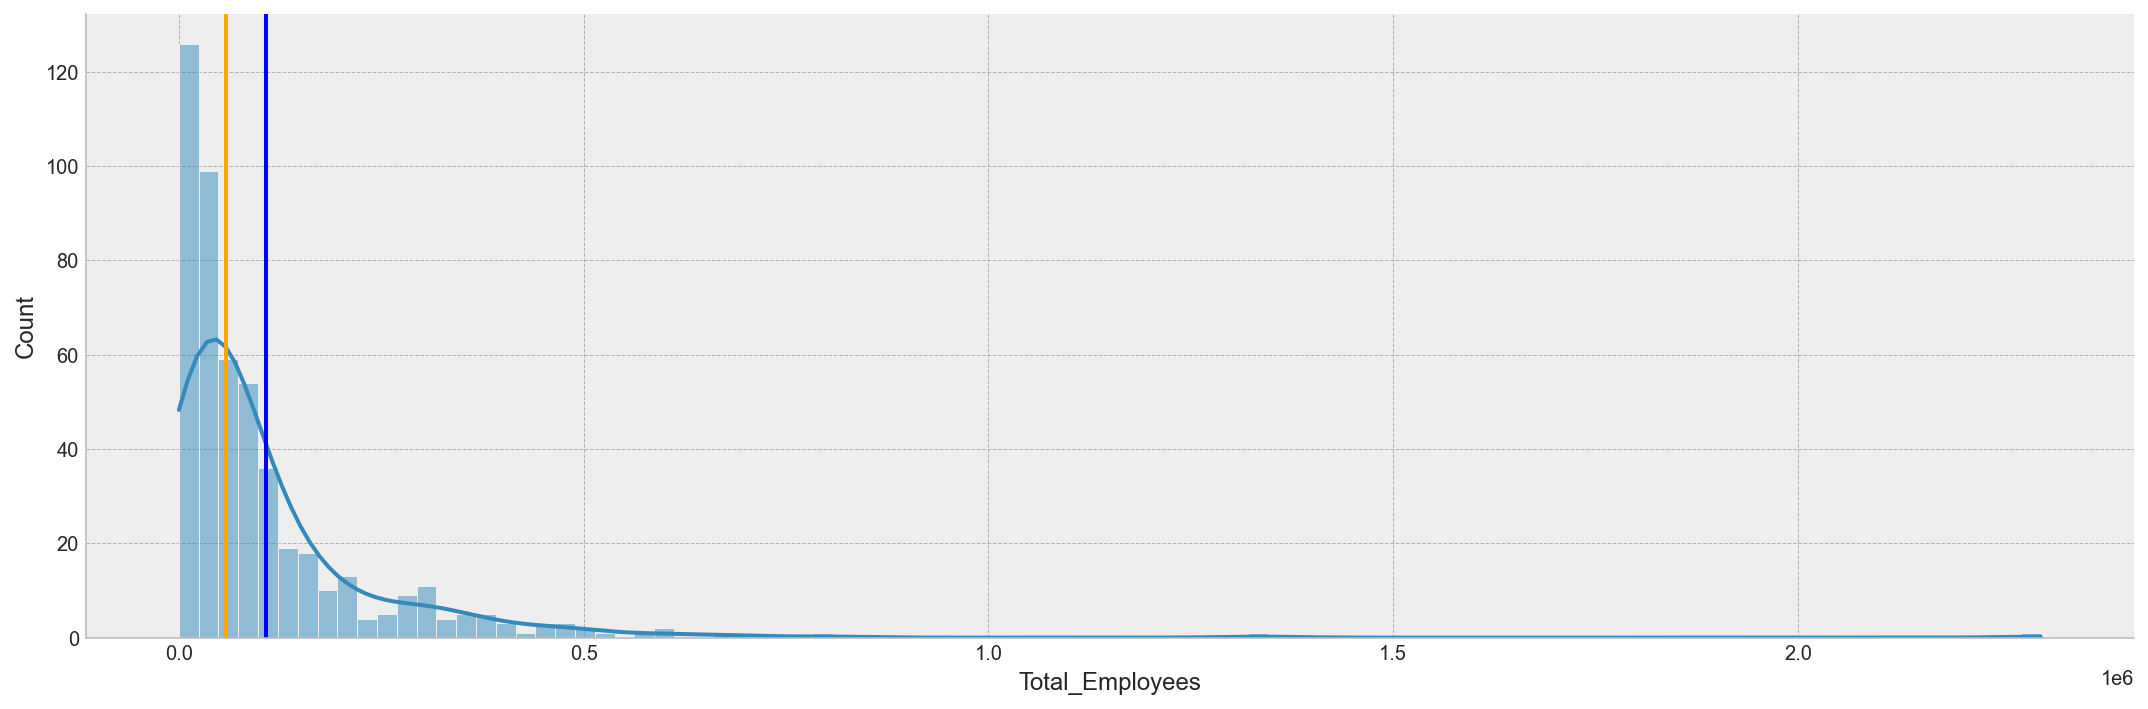

In [68]:
sns.displot(data = final_df1, x = final_df1['Total_Employees'], height = 5, aspect = 15/5, kde = True)
plt.axvline(final_df1['Total_Employees'].mean(), color = 'blue')
plt.axvline(final_df1['Total_Employees'].median(), color = 'orange');

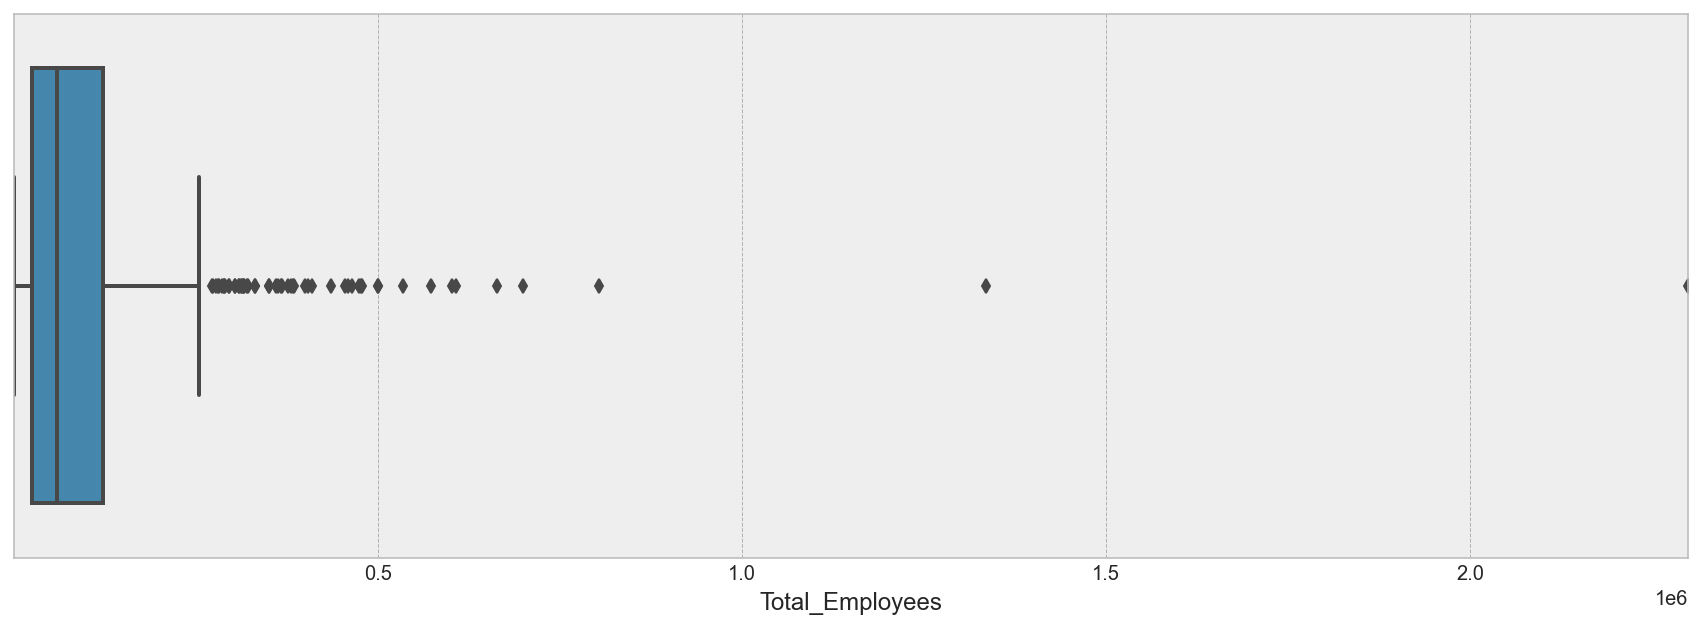

In [69]:
plt.figure(figsize=(15,5))
x=sns.boxplot(data=final_df1,  x = final_df1[~final_df1.Total_Employees.isna()]['Total_Employees'])
x.set_xlim(55.0,2300000.0);

In [70]:
# the above distribution plot is not symmetric so we used median to replace the nan values
final_df1.Total_Employees.fillna(final_df1.Total_Employees.median(),inplace=True)

In [71]:
# we converted dtype float to int
final_df1['Total_Employees']=final_df1['Total_Employees'].astype(int)

In [72]:
# Here the columns are in object type so, we used mode
final_df1['Annual_Revenue_till'].fillna(final_df1['Annual_Revenue_till'].median(),inplace=True)
final_df1['Annual_Net_Income_till'].fillna(final_df1['Annual_Net_Income_till'].median(),inplace=True)
final_df1['Employee_Count_as_on_Date'].fillna(final_df1['Employee_Count_as_on_Date'].median(),inplace=True)

In [73]:
final_df1['CEO'].fillna(final_df1['CEO'].mode()[0],inplace=True)

In [74]:
final_df1['Annual_Revenue_till']=final_df1['Annual_Revenue_till'].astype(int)
final_df1['Annual_Net_Income_till']=final_df1['Annual_Net_Income_till'].astype(int)
final_df1['Employee_Count_as_on_Date']=final_df1['Employee_Count_as_on_Date'].astype(int)

In [75]:
final_df1['Annual_Revenue_till']=final_df1['Annual_Revenue_till'].astype(str)
final_df1['Annual_Net_Income_till']=final_df1['Annual_Net_Income_till'].astype(str)
final_df1['Employee_Count_as_on_Date']=final_df1['Employee_Count_as_on_Date'].astype(str)

In [76]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Headquarter_of_Company      500 non-null    object 
 3   Market_Cap(In_Billion_USD)  500 non-null    float64
 4   Annual_Revenue_till         500 non-null    object 
 5   Annual_revenue              500 non-null    object 
 6   Annual_Net_Income_till      500 non-null    object 
 7   Annual_Net_income           500 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Employees             500 non-null    int32  
 10  Employee_Count_as_on_Date   500 non-null    object 
 11  CEO                         500 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 45.0+ KB


In [77]:
final_df1.isna().sum()

Company_Names                 0
World_Ranks(Jan-2020)         0
Headquarter_of_Company        0
Market_Cap(In_Billion_USD)    0
Annual_Revenue_till           0
Annual_revenue                0
Annual_Net_Income_till        0
Annual_Net_income             0
Sector                        0
Total_Employees               0
Employee_Count_as_on_Date     0
CEO                           0
dtype: int64

In [78]:
final_df1

,Company_Names,World_Ranks(Jan-2020),Headquarter_of_Company,Market_Cap(In_Billion_USD),Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Employees,Employee_Count_as_on_Date,CEO
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,Saudi Arabia,1898.10,2020,862 Billion SAR,2020,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining,...",79800,2021,Amin H. Al-Nasser
1,APPLE,2,USA,1323.00,2020,274.51 Billion USD,2020,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronic...",154000,2021,Tim Cook
2,MICROSOFT CORPORATION,3,USA,1215.00,2020,143.00 Billion USD,2020,44.30 Billion USD,"Technology, Software and IT, Laptops, Video G...",182268,2021,Satya Nadella
3,ALPHABET,4,USA,943.90,2020,182.52 Billion USD,2020,40.26 Billion USD,"Technology, Internet or Mobile App Based Busi...",156500,2021,Sundar Pichai
4,AMAZON.COM,5,USA,941.03,2020,386.06 Billion USD,2020,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busin...",1335000,2021,Andy Jassy
...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,471,Japan,32.65,2019,644 Billion JPY,2019,218 Billion JPY,"Consumer Defensive, Retail, Super Markets, Co...",138808,2021,Ryuichi Isaka
496,ASSICURAZIONI GENERALI,472,Italy,32.61,2019,693 Million EUR,2019,670 Million EUR,"Financial Services, Insurance",72644,2021,Philippe Donnet
497,AMPHENOL CORPORATION,473,USA,32.53,2019,225 Million USD,2019,155 Million USD,"Technology, Electronics, Cables and Wires, El...",90000,2021,Richard Adam Norwitt
498,GENERAL MILLS,474,USA,32.52,2019,627 Million USD,2019,181 Million USD,"Consumer Defensive, Food Products, FMCG, Dair...",35000,2021,Jeff Harmening


In [79]:
pd.options.display.float_format='{:.2f}'.format

In [80]:
final_df1.describe()

,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Total_Employees
count,500.00,500.00,500.00
mean,236.63,95.79,107890.52
std,135.77,144.28,165150.95
min,1.00,32.46,55.00
25%,120.75,42.11,24409.75
50%,234.50,56.34,58250.00
75%,354.25,95.76,122000.00
max,475.00,1898.10,2300000.00


In [81]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Headquarter_of_Company      500 non-null    object 
 3   Market_Cap(In_Billion_USD)  500 non-null    float64
 4   Annual_Revenue_till         500 non-null    object 
 5   Annual_revenue              500 non-null    object 
 6   Annual_Net_Income_till      500 non-null    object 
 7   Annual_Net_income           500 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Employees             500 non-null    int32  
 10  Employee_Count_as_on_Date   500 non-null    object 
 11  CEO                         500 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 45.0+ KB


In [82]:
final_df1.to_csv(r'c:\Projects\company_data.csv')
final_df1.to_excel(r'c:\Projects\company_data.xlsx')

# Univariate Analysis

## 1. For categorical
1. pie chart
2. Count chart
3. Bar chart


In [83]:
final_df1.select_dtypes(include=np.object).columns

Index(['Company_Names', 'Headquarter_of_Company', 'Annual_Revenue_till',
       'Annual_revenue', 'Annual_Net_Income_till', 'Annual_Net_income',
       'Sector', 'Employee_Count_as_on_Date', 'CEO'],
      dtype='object')

##  Count plot

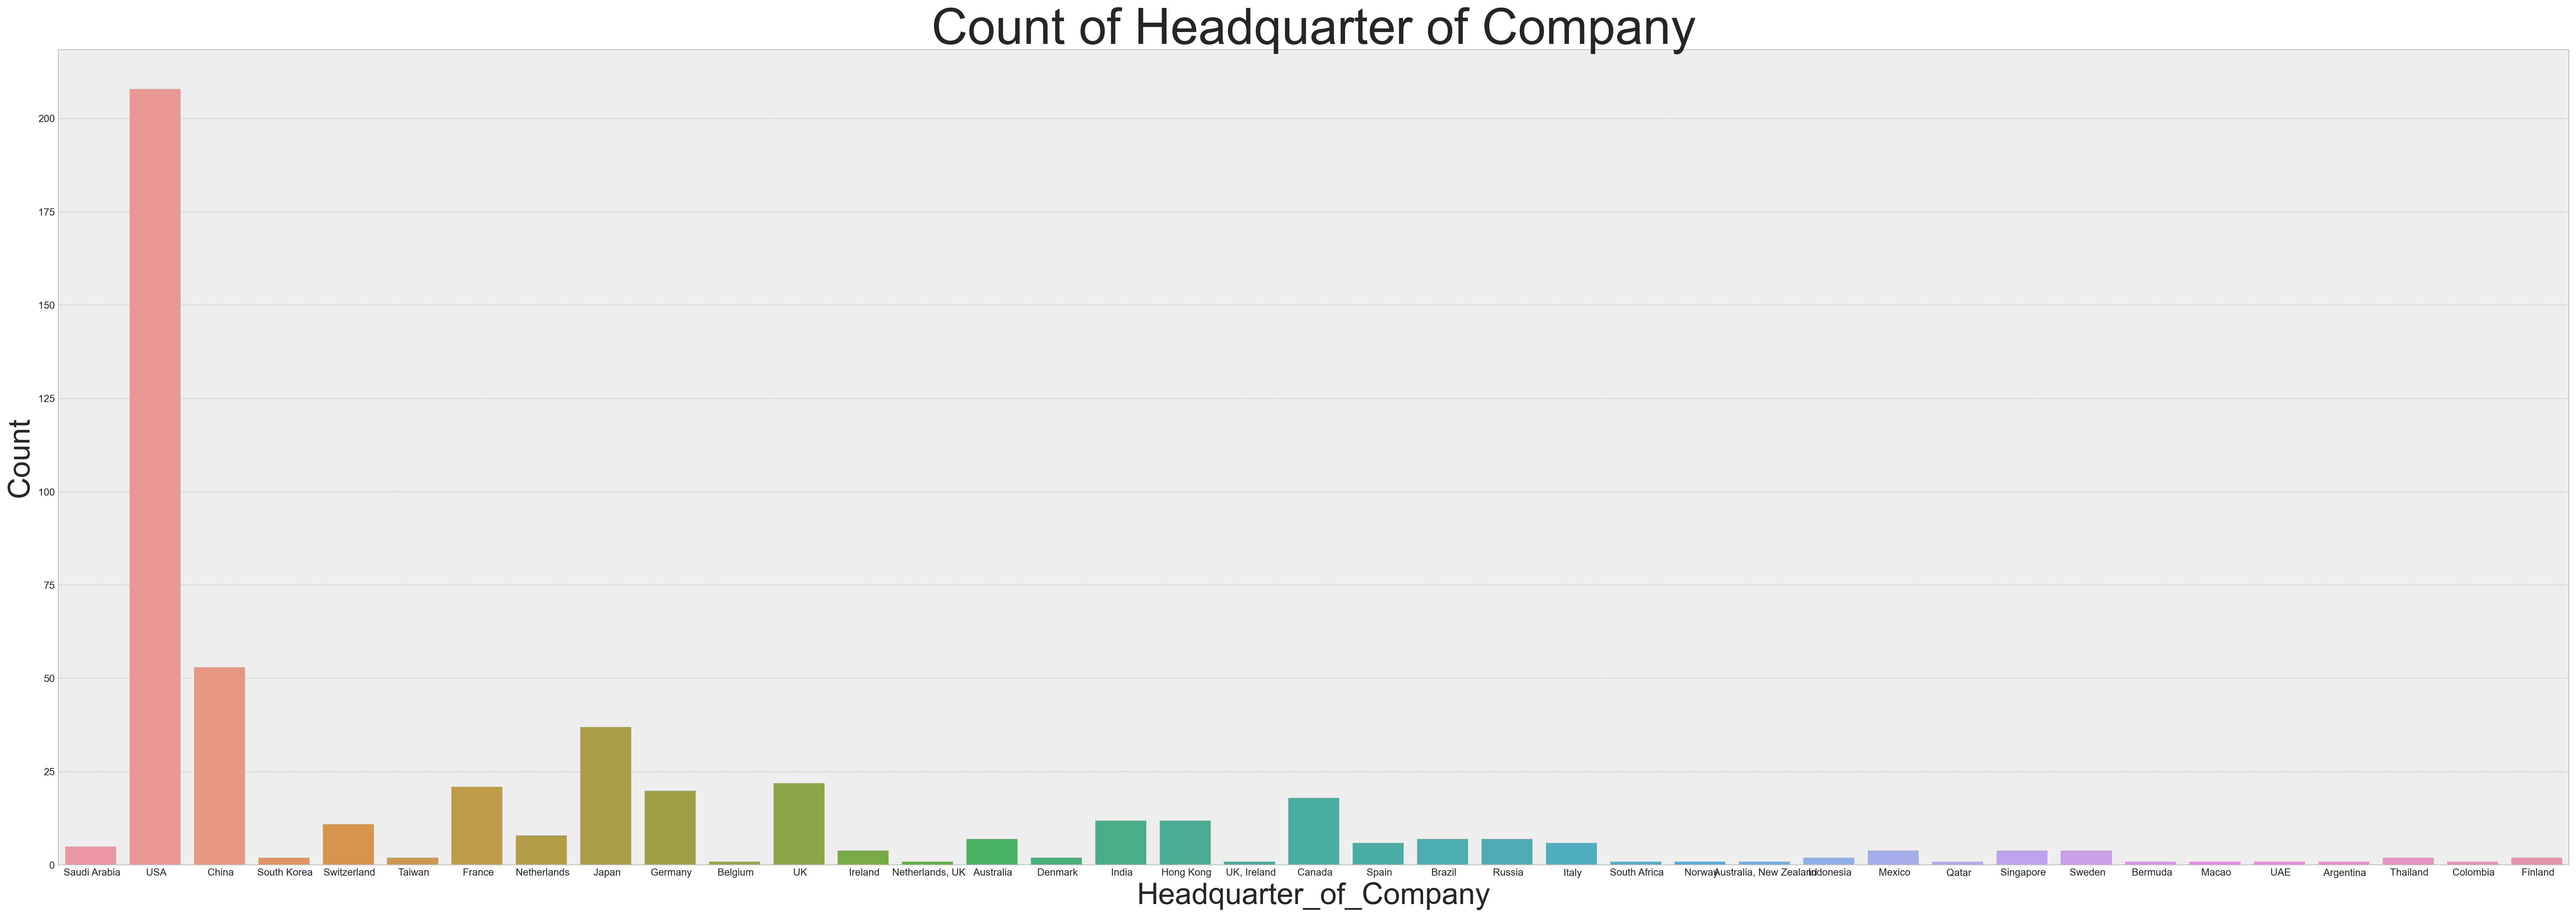

In [84]:
plt.figure(figsize=(45,15),dpi=100)

sns.countplot(data=final_df1,x='Headquarter_of_Company')
plt.xlabel('Headquarter_of_Company',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.title('Count of Headquarter of Company',fontsize=50);

##  2. For Numerical
1. Histogram
2. Box plot 
3. Distribution

In [85]:
final_df1.select_dtypes(include=np.number).columns

Index(['World_Ranks(Jan-2020)', 'Market_Cap(In_Billion_USD)',
       'Total_Employees'],
      dtype='object')

### Distribution plot

<Figure size 1080x360 with 0 Axes>

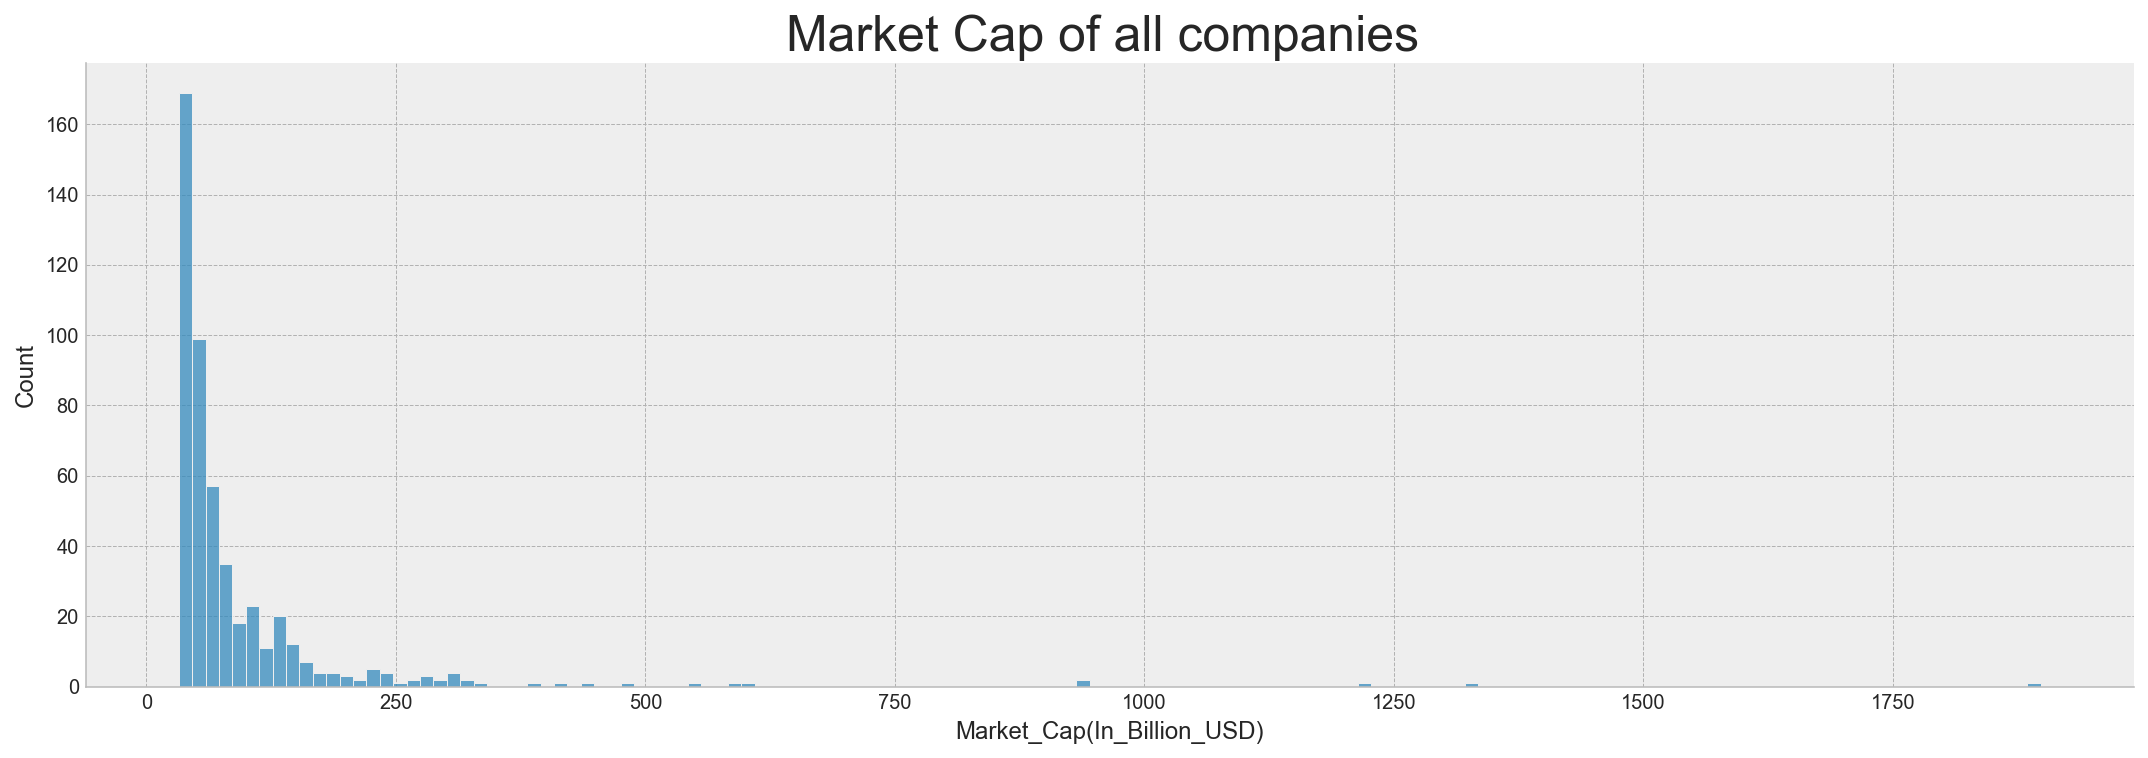

In [86]:
plt.figure(figsize=(15,5))
sns.displot(data = final_df1, x = final_df1['Market_Cap(In_Billion_USD)'], height = 5, aspect = 15/5)
plt.title('Market Cap of all companies ',fontsize=25);

## Bivariate Analysis 

###   Categorical & Numerical
1. Bar chart
2. Group By

## Bar chart

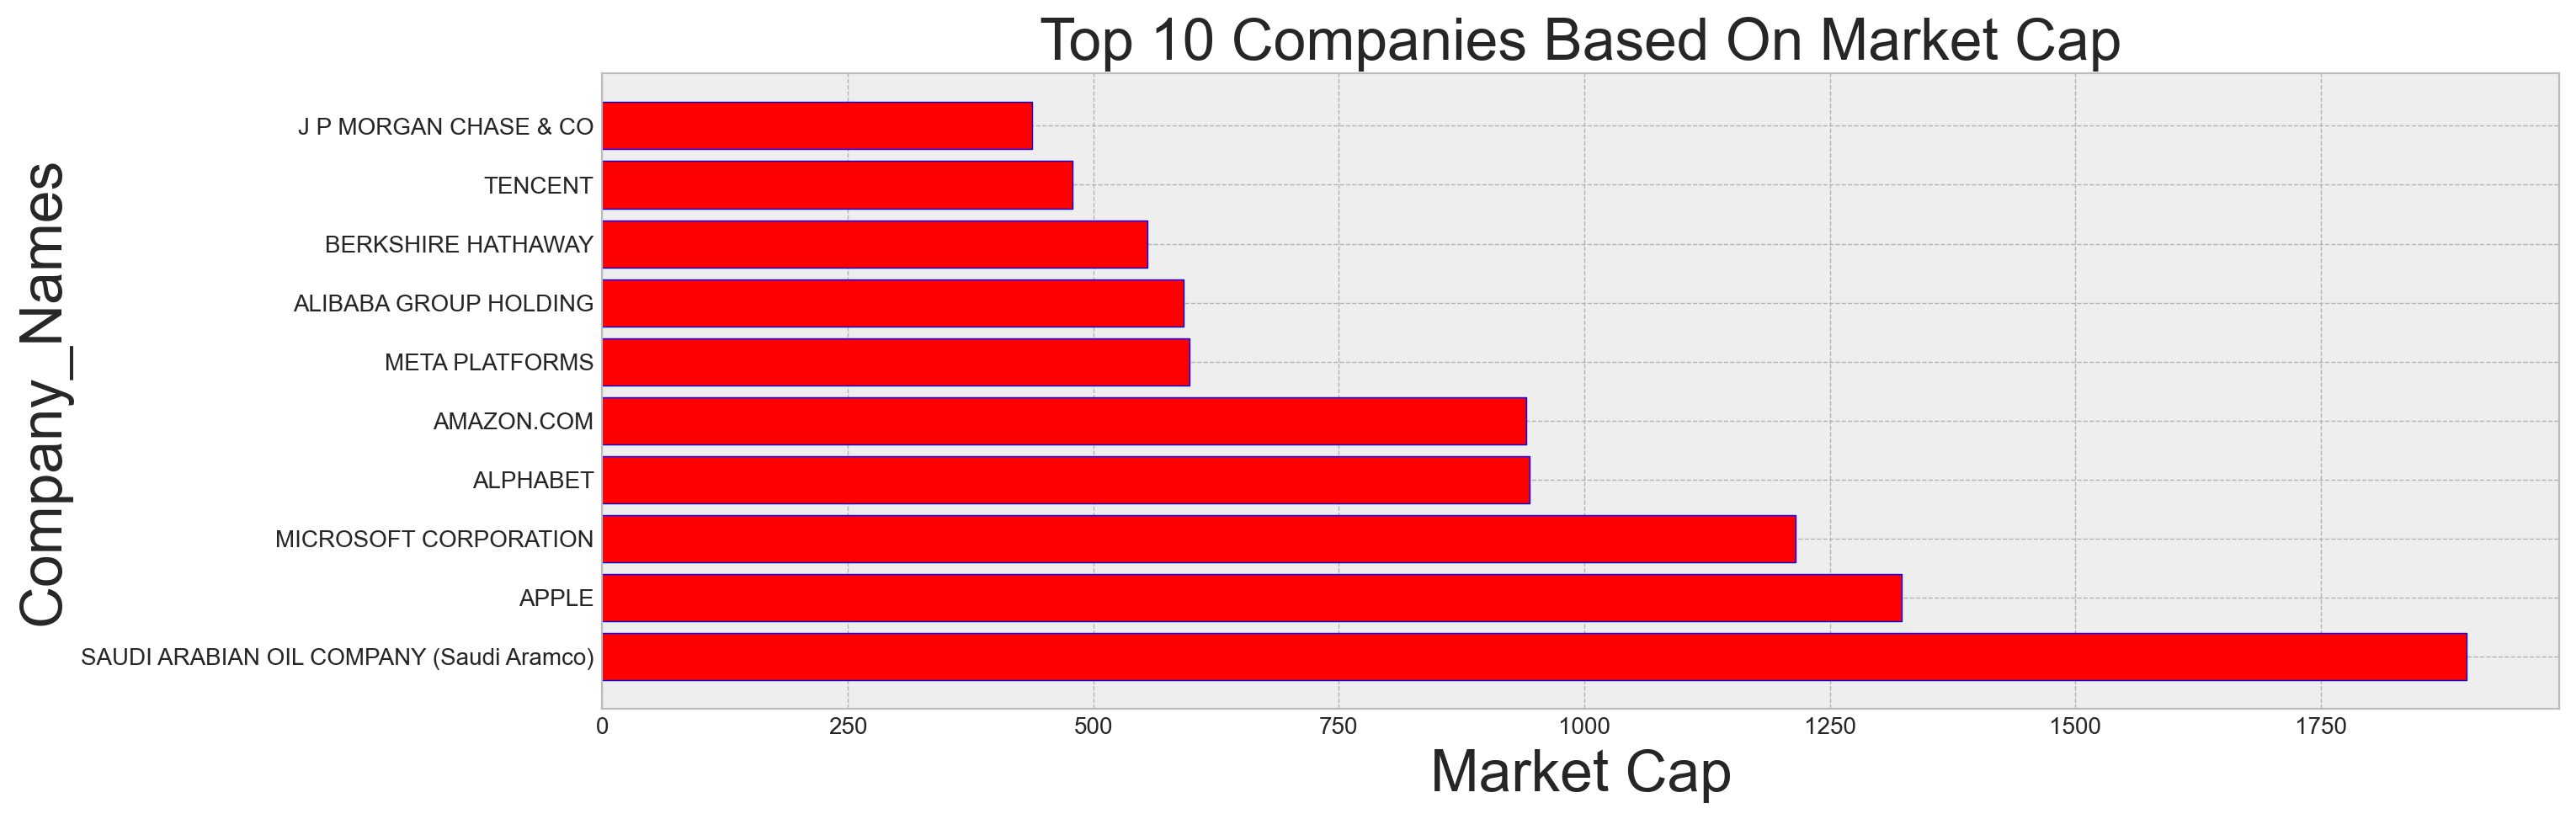

In [87]:
plt.figure(figsize=(15,5),dpi=100)
plt.barh(final_df1.Company_Names[0:10],final_df1['Market_Cap(In_Billion_USD)'][0:10],color='red',edgecolor='blue')
plt.xlabel('Market Cap',fontsize=25)
plt.ylabel('Company_Names',fontsize=25);
plt.title('Top 10 Companies Based On Market Cap',fontsize=25);

### Numerical & Numerical
1. Correlation 
2. Scatter plot
3. Heat map

### Heat Map

In [88]:
final_df1.corr()

,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Total_Employees
World_Ranks(Jan-2020),1.00,-0.52,-0.24
Market_Cap(In_Billion_USD),-0.52,1.00,0.24
Total_Employees,-0.24,0.24,1.00


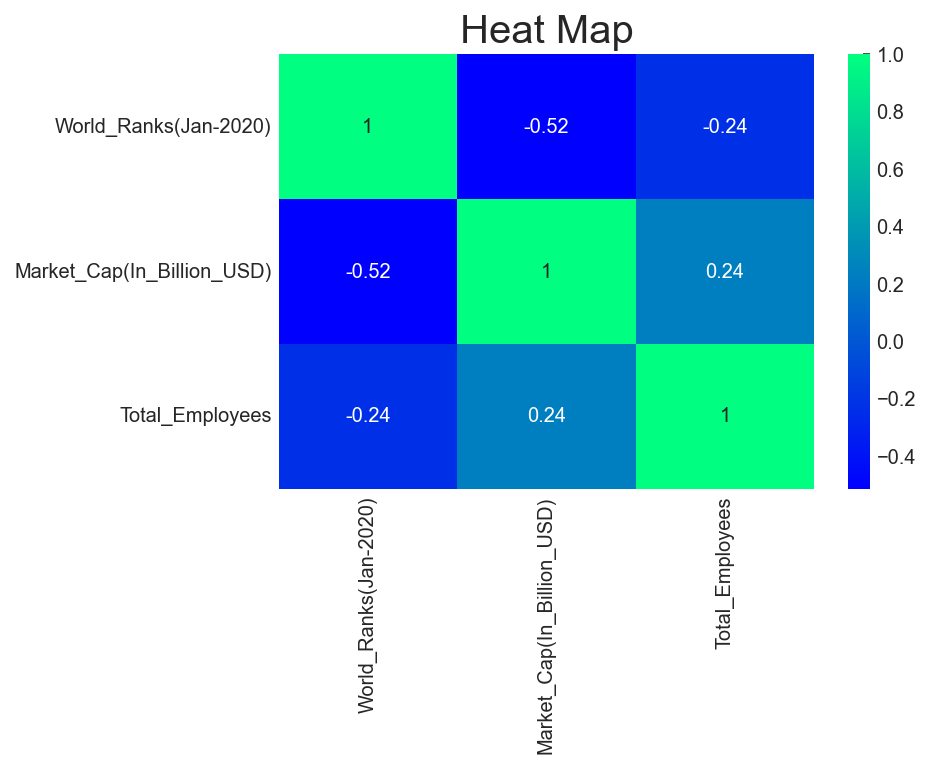

In [89]:
sns.heatmap(final_df1.corr(),cmap='winter',annot=True)
plt.title('Heat Map',fontsize=20);

### For The Visualization

In [90]:
final_df2=final_df1.copy()

In [91]:
final_df2['Annual_Revenue']=final_df2['Annual_revenue'].apply(lambda x:str(x).split()).apply(lambda x:x[0])
final_df2['Annual_Revenue(mbtc)']=final_df2['Annual_revenue'].apply(lambda x:str(x).split()).apply(lambda x:x[1:3])

In [92]:
final_df2['Annual_Net_Income']=final_df2['Annual_Net_income'].apply(lambda x:str(x).split()).apply(lambda x:x[0])
final_df2['Annual_Net_Income(mbtc)']=final_df2['Annual_Net_income'].apply(lambda x:str(x).split()).apply(lambda x:x[1:3])

In [93]:
final_df2['Annual_Revenue(mbtc)']=final_df2['Annual_Revenue(mbtc)'].apply(lambda x : ' '.join(x))
final_df2['Annual_Net_Income(mbtc)']=final_df2['Annual_Net_Income(mbtc)'].apply(lambda x : ' '.join(x))

In [94]:
final_df2['Annual_Net_Income']=final_df2['Annual_Net_Income'].str.strip().str.replace('-','')

In [95]:
final_df2.replace('',np.nan,inplace=True)

In [96]:
final_df2['Annual_Revenue']=final_df2['Annual_Revenue'].astype(float)
final_df2['Annual_Net_Income']=final_df2['Annual_Net_Income'].astype(float)

In [97]:
final_df2['Annual_Net_Income'].interpolate(method='ffill',limit_direction='forward',inplace=True)

In [98]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Headquarter_of_Company      500 non-null    object 
 3   Market_Cap(In_Billion_USD)  500 non-null    float64
 4   Annual_Revenue_till         500 non-null    object 
 5   Annual_revenue              500 non-null    object 
 6   Annual_Net_Income_till      500 non-null    object 
 7   Annual_Net_income           500 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Employees             500 non-null    int32  
 10  Employee_Count_as_on_Date   500 non-null    object 
 11  CEO                         500 non-null    object 
 12  Annual_Revenue              500 non-null    float64
 13  Annual_Revenue(mbtc)        500 non

In [99]:
final_df2.isna().sum()

Company_Names                 0
World_Ranks(Jan-2020)         0
Headquarter_of_Company        0
Market_Cap(In_Billion_USD)    0
Annual_Revenue_till           0
Annual_revenue                0
Annual_Net_Income_till        0
Annual_Net_income             0
Sector                        0
Total_Employees               0
Employee_Count_as_on_Date     0
CEO                           0
Annual_Revenue                0
Annual_Revenue(mbtc)          0
Annual_Net_Income             0
Annual_Net_Income(mbtc)       0
dtype: int64

## Multivariate Analysis

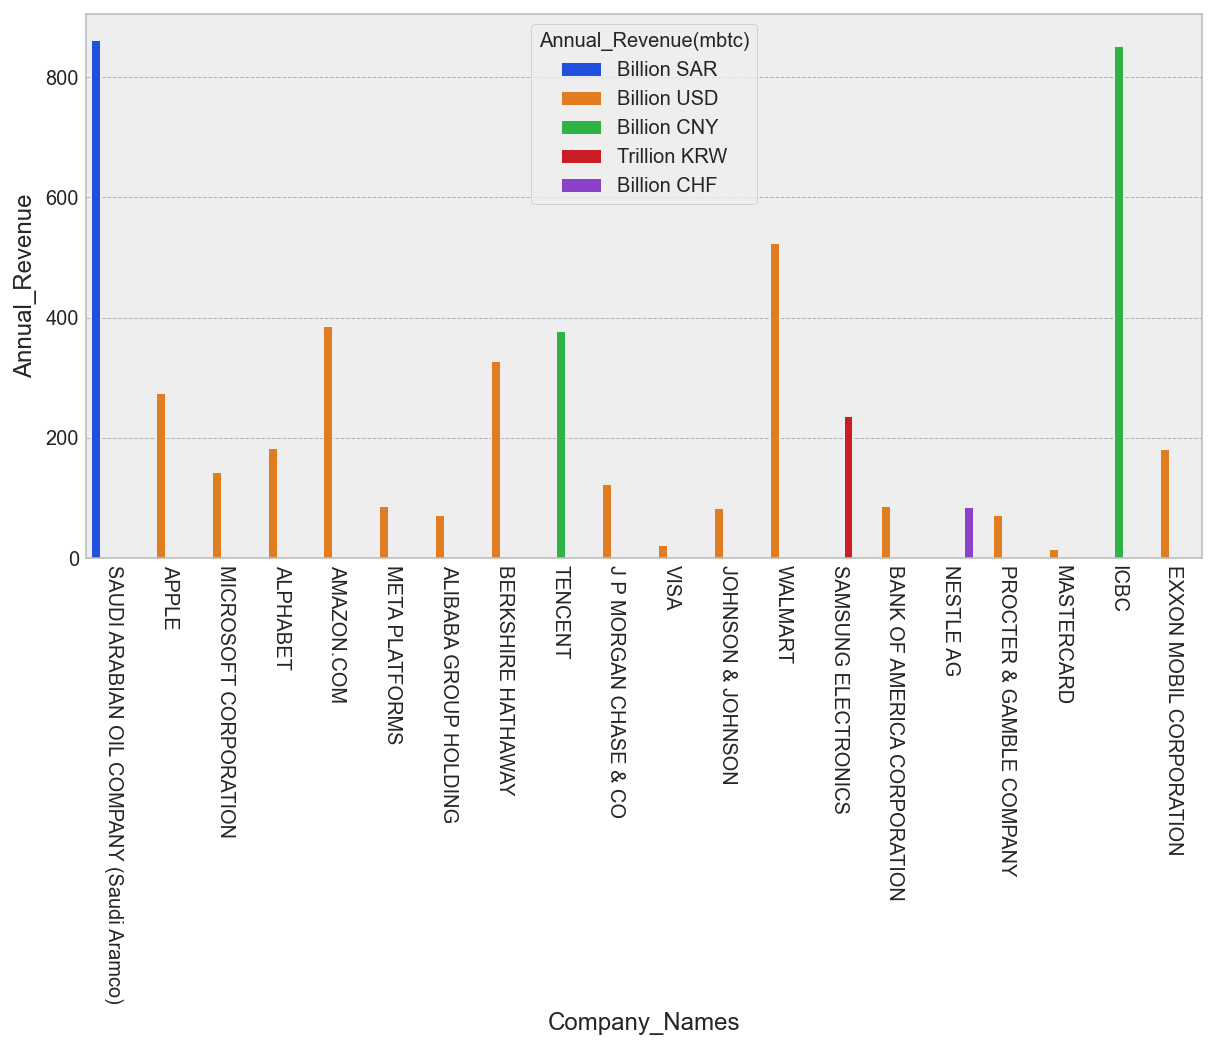

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Company_Names', y = 'Annual_Revenue', hue = 'Annual_Revenue(mbtc)',
            data = final_df2[:20], 
            ci = None,palette='bright',
           estimator=np.sum)
plt.xticks(rotation = 270);

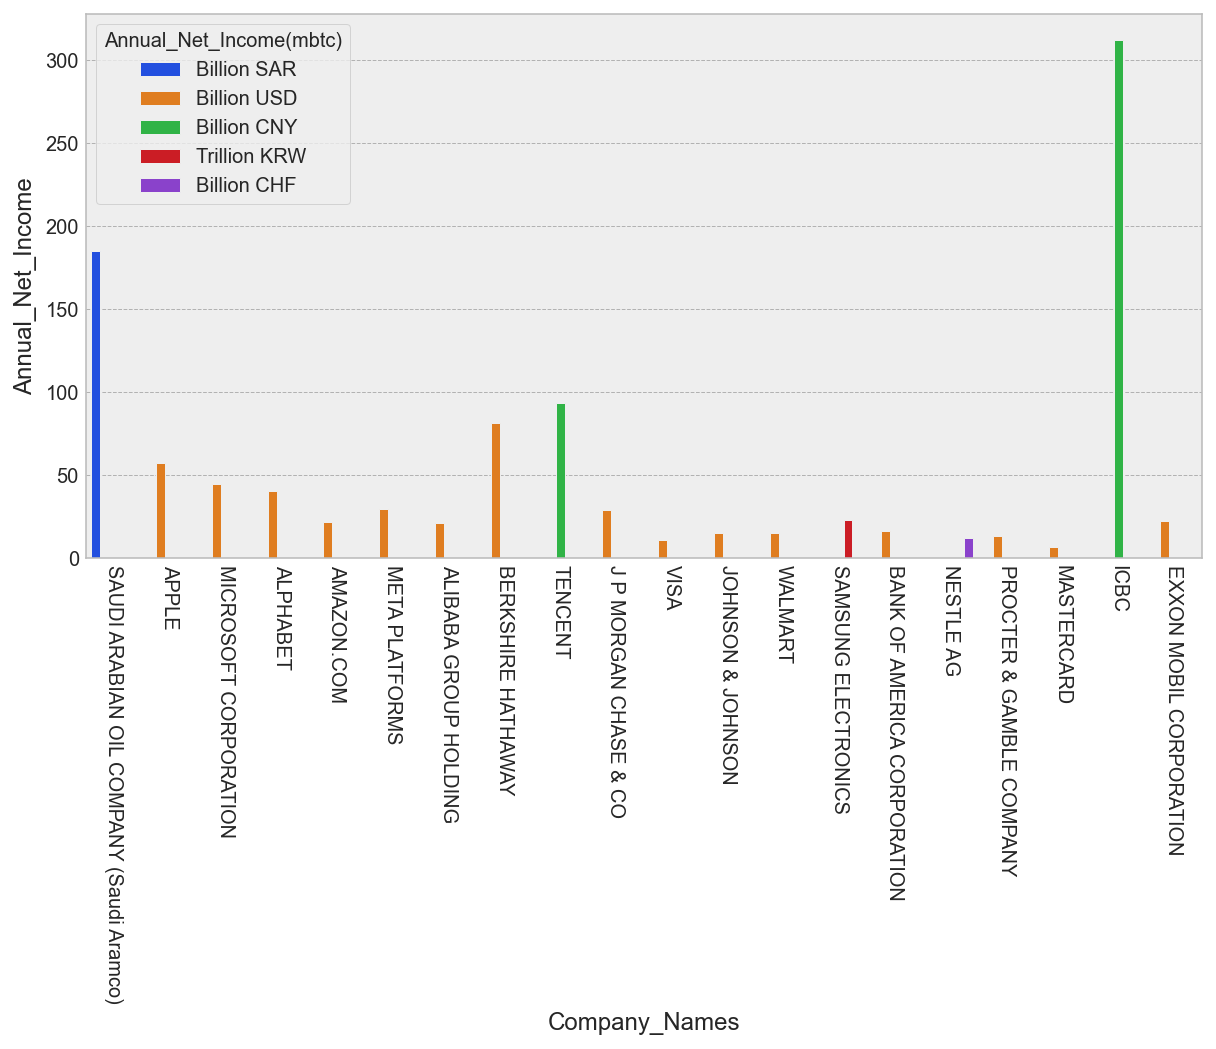

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Company_Names', y = final_df2['Annual_Net_Income'].astype(float), hue = 'Annual_Net_Income(mbtc)',
            data = final_df2[:20], 
            ci = None,palette='bright',
           estimator=np.sum);
plt.xticks(rotation = 270);

**Some of indian companies and their details**

In [108]:
final_df1[final_df1['Headquarter_of_Company']==' India']

,Company_Names,World_Ranks(Jan-2020),Headquarter_of_Company,Market_Cap(In_Billion_USD),Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Employees,Employee_Count_as_on_Date,CEO
70,RELIANCE INDUSTRIES,70,India,136.37,2020,205 Crores INR,2020,324 Crores INR,"Energy, Conglomerate, Oil and Gas, Chemicals,...",236330,2021,Mukesh Ambani
98,TATA CONSULTANCY SERVICES (TCS),97,India,113.36,2020,1569.5 Billion INR,2020,324.5 Billion INR,"Technology, Software and IT, Software Consult...",606331,2022,Rajesh Gopinathan
124,HDFC BANK,120,India,98.69,2020,1470.68 Billion INR,2020,272.9 Billion INR,"Financial Services, Banking Services",120093,2021,Sashidhar Jagdishan
231,HDFC,216,India,59.70,2020,1017.25 Billion INR,2020,170.80 Billion INR,"Financial Services, Banking Services, Asset M...",3226,2021,Sashidhar Jagdishan
235,HINDUSTAN UNILEVER,220,India,58.44,2019,387 Billions INR,2019,60 Billions INR,"Consumer Defensive, FMCG, Food Products, Pers...",21000,2021,Sanjiv Mehta
